

# <font face = 'calibri' color='red'>Vrush's analysis of the SNAP Reddit Data Set</font>
<p><font size = '4' face = 'calibri' color='black'>There is going to a be variety of different analysis including graph (network) analysis to find interesting behaviors of the people of Reddit. This dataset has a focus on the sentiment (whether it's well meaning or not) of the post  which is the thing that interested me. More of how this was determined could be found in the link below   </font></p>
 <p><font face = 'calibri' size = '4' color='black'>   I plan on making the notebook look cleaner (via some library to hide cells) at the end of the project where I will hide the cells and present the data</font>
</p>
  <p>To make the notebook look cleaner as of now I put the data extraction and imports on the bottom to reduce scrolling </p> 
  http://snap.stanford.edu/data/soc-RedditHyperlinks.html

## rank_activity(network (adjacency list)) 
Gets the most relevant subreddits with the most data in the adjacency list. I mostly made this function to get a refresher on how python dictionaries work since I've been doing a lot of cpp for school 


In [6]:
subs = rank_activity(network)[1]
subs_with_most_activity = subs[0 : 10]
data_t = "num_unique_words"# This decides what type of data to look for
body_t = True # This decides whether it looks at titles or the body of the post or title

In [7]:
df = make_dataframe(network, subs)
negative_posts = df.query('negative_sentiment == 1') 
positive_posts = df.query('negative_sentiment == 0')

# LIWC_tense relating to sentiment (logistic regression)

## Background 
* LIWC is a text parser that categorizes words into many different things relating to many different topics such as a percentage of the text. A full list of the categories used on this data set could be found here below. Many academic papers use this so it is atleast somewhat a reliable categorizer
    * http://snap.stanford.edu/data/soc-RedditHyperlinks.html
* A plot on one in the y axis on the 3 plots below would represent a post with negative sentiment and a 0 would represent a neutral or positive post according to the sentiment analysis of the people who made the data set.

## Findings

* One of these regression plots by themselves would give decent insight but all three together give a better insight and knowing the period of time gives even MORE insight (2014 - 2017)

    ### LIWC_present  
    
    * Redditors seem to be more negative as more of their post discusses present events (as determined by LIWC) This is also only one of the tenses that correlates with sentiment at all it seems.
    
    * The 2016 US election could be a big reason for this since me as a highschool freshmen back then remember there being many negative headlines and just overall negative sentiment from social media. And many people do get pretty aggressive and emotional (to an unhealthy unextent) when it comes to their politcal standings so I would not be suprised
        * To be more sure of my conclusion I will do timestamp analysis for the year before and the year of the election.  
        
 ### LIWC_past 
    
    * There seems to not be not much correlation as people type out more words relating to past events and the past in general to sentiment in general. The decently sized visible confidence interval after using a big sample size is also a indicator of this
    * I thought personally thought it would correlate with positive sentiment due to nostalgia but history and past atrocities are often discussed such as the wars and genocides so there might be a balancing effect. 
        * I might do LIWC analysis with VADER values (linear regression instead of logistic) on the Y which is a continuous and not binary like the assigned sentiment but that is repititive in nature so maybe not.
    
  ### LIWC_future 
    
    * Again there seems to be no correlation like for LIWC_past
    * I often see people being scared about AI taking over jobs in the future so I expected negative sentiment but new technology is pretty exciting and reddit users tend to be more on the nerdier side than the general population so it somehwhat makes sense. 
        
   
     
    
    
   
 

<IPython.core.display.Javascript object>


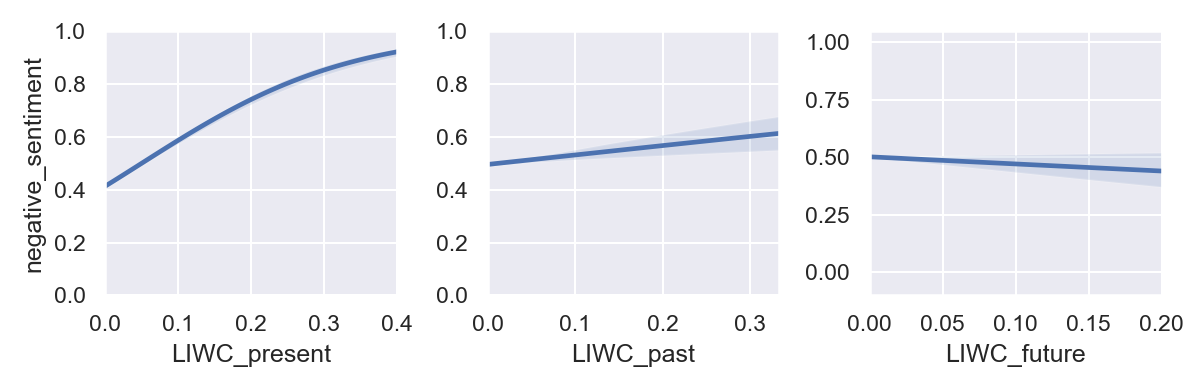

In [18]:
%matplotlib notebook
# getting a equal amount of both samples to get more accurate information relating to following analysis
sample = pd.concat([negative_posts.sample(15000), positive_posts.sample(15000)]) 
# There is alot of data so more samples are needed to get a more accurate picture with tighter confidence interval bounds

f = plt.figure(figsize=(8, 2.6))
gs = f.add_gridspec(1, 3)


ax1 = f.add_subplot(gs[0, 0])
ax1 = sb.regplot(x="LIWC_present", y="negative_sentiment", data= sample,
                logistic=True,  y_jitter=.05, n_boot = 100, scatter = False)
ax1.set(ylim=(0, 1))

ax2 = f.add_subplot(gs[0, 1])
ax2 = sb.regplot(x="LIWC_past", y="negative_sentiment", data= sample,
                logistic=True,  y_jitter=.03,n_boot = 100, scatter =False)
ax2.set(ylabel = None, ylim=(0, 1))


ax3 = f.add_subplot(gs[0, 2])
ax3 = sb.regplot(x="LIWC_future", y="negative_sentiment", data= sample,
                logistic=True,  y_jitter=.03,n_boot = 100, scatter = False)
ax3.set(ylabel = None, ylim=(0, 1))


plt.ylim(-.102, 1.05)
f.tight_layout()


### Parsed text files  to make graph network in the form of adjacency list (not pandas friendly so I later made code to convert  into dataframe) I then used the hyperlink objects 



In [9]:
mega_network = RedditNetwork()
#first make network from hyperlink from bodies of posts
mega_network\
    .make_network("/Users/vrushhabh/PycharmProjects/subreddit-conflict-graph-analyzer/soc-redditHyperlinks-body1.tsv")

#second grow network from hyperlinks from titles of posts
mega_network\
    .make_network("/Users/vrushhabh/PycharmProjects/subreddit-conflict-graph-analyzer/soc-redditHyperlinks-title.tsv"
                  ,False)
network = mega_network.get_network() #get the adjacency list

In [3]:
import sys
import jupyterthemes
from jupyterthemes import jtplot
sys.path.append('../')
from reddit_network import RedditNetwork 
from network_analyzer import * 
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sb
import random
import numpy as np
sb.set_theme()